# TASK 2 

# importing libraries


In [36]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read the data set


In [37]:
#reading the dataset
df=pd.read_csv(r'http://bit.ly/w-data')

In [38]:
#reading the first five rows of the datasets
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
#reading the last five datsets
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [73]:
#information about the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# shape of dataset

In [40]:
#no of rows and columns of the datsets
df.shape

(25, 2)

In [41]:
#sum of null data 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting histogram 

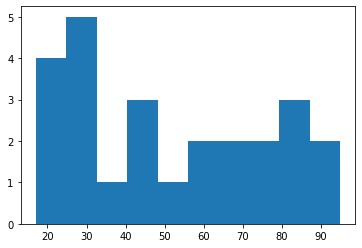

In [42]:
plt.hist('Scores',data=df,bins=10)
plt.show()

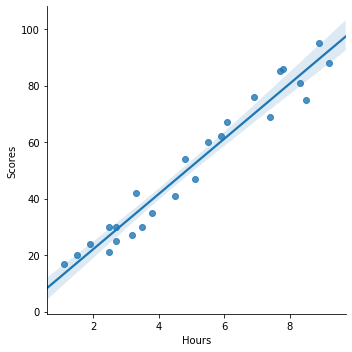

In [43]:
sns.lmplot(x='Hours',y='Scores',data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


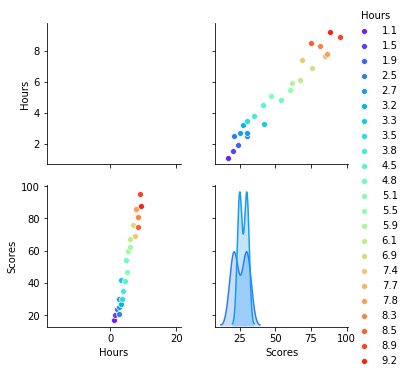

In [44]:
#pairplot with seaborn
sns.pairplot(df,hue='Hours',palette='rainbow')

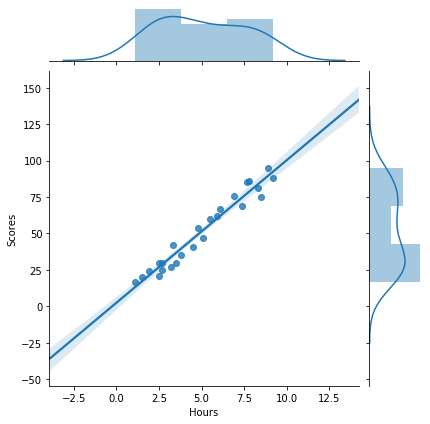

In [72]:
#jointplot with sns
sns.jointplot('Hours','Scores',data=df,kind='reg')

# importing sklearn

In [46]:

from sklearn.model_selection import train_test_split

In [47]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

# splitting the data set

In [48]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [49]:
#importing linear regression 
from sklearn.linear_model import LinearRegression

In [50]:
Lreg=LinearRegression()

In [51]:
#fitting the model 
Lreg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#accuracy on the test model
Lreg.score(train_x,train_y)

0.9522312444716324

# Predictions for the test dataset

In [53]:
pred=Lreg.predict(test_x)
pred

array([40.59446207, 22.42694026, 37.72590599, 28.16405241, 60.6743546 ])

In [54]:
df1=pd.DataFrame({'Actual':test_y,'Predicted': pred})

In [55]:
df1

,Actual,Predicted
0,35,40.594462
1,24,22.426940
2,30,37.725906
3,21,28.164052
4,62,60.674355


In [56]:
df1.shape

(5, 2)

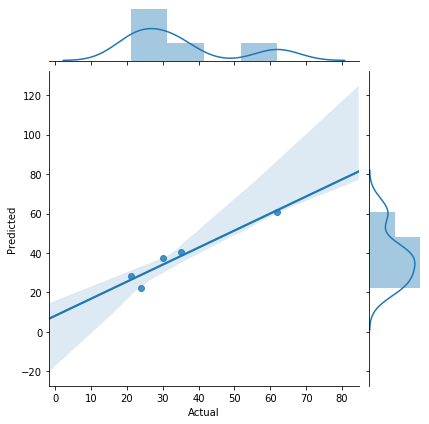

In [58]:
sns.jointplot('Actual','Predicted',data=df1,kind='reg')

# Finding out the predicted score with 9.5 hours

In [75]:
n=float(input())
hours=np.array([n])
hours=hours.reshape(-1,1)
own_pred=Lreg.predict(hours)
print("No of Hours={}".format(hours))
print("predicted score={}".format(own_pred[0]))

9.5
No of Hours=[[9.5]]
predicted score=95.09702749690646


# Finding out the accuracy of our model

In [65]:
from sklearn import metrics
print('Mean Absolute error :',metrics.mean_absolute_error(test_y,pred))
print('mean squared error :',metrics.mean_squared_error(test_y,pred))
print('root mean squared error :',np.sqrt(metrics.mean_squared_error(test_y,pred)))

Mean Absolute error : 4.6766251238382335
mean squared error : 29.308625783942905
root mean squared error : 5.413744155752367
